In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


In [4]:
data = pd.read_csv('../../../data/bioresponse/train.csv')

In [42]:
data.isna().sum().sum()

0

In [43]:
train, y = data.drop('Activity', axis=1), data['Activity']

In [44]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.8, random_state=241)

In [61]:
boosting_params = {
    'learning_rate': [1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001]
}

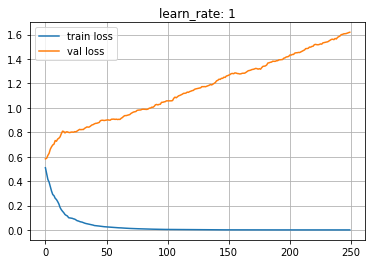

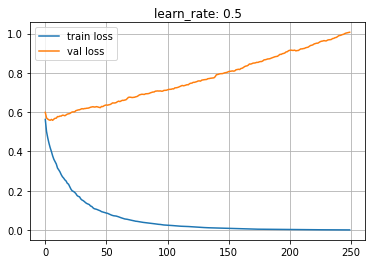

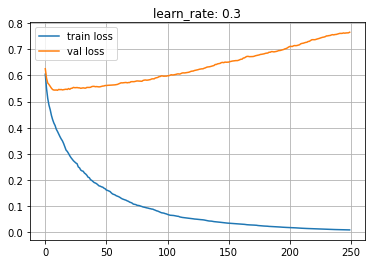

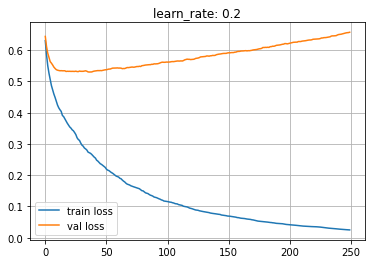

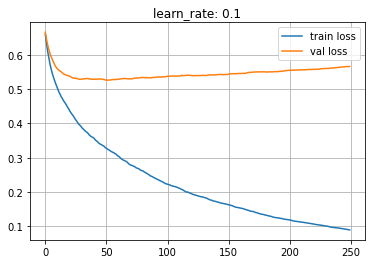

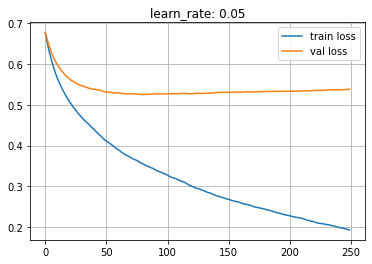

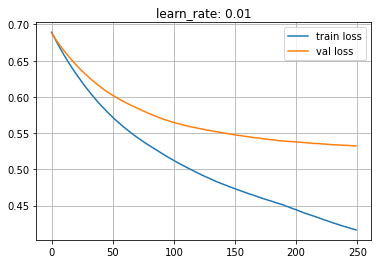

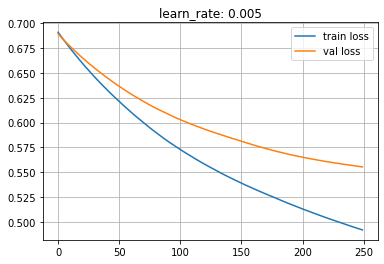

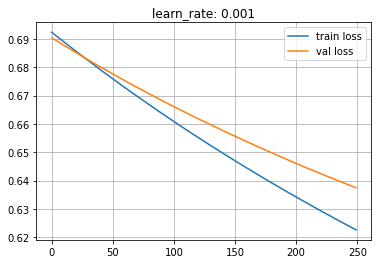

In [62]:
train_scores = {}
val_scores = {}
for learn_rate in boosting_params['learning_rate']:
    
    gbc = GradientBoostingClassifier(learning_rate=learn_rate, random_state=241, n_estimators=250, verbose=False)
    gbc.fit(X_train, y_train)
    a = gbc.staged_decision_function(X_train)
    train_scores[learn_rate] = []
    val_scores[learn_rate] = []
    for i, pred in enumerate(gbc.staged_decision_function(X_train)):
        res = 1 / (1 + np.exp(-pred))
        res = log_loss(y_train, res)
        train_scores[learn_rate].append(res)
    for i, pred in enumerate(gbc.staged_decision_function(X_val)):
        res = 1 / (1 + np.exp(-pred))
        res = log_loss(y_val, res)
        val_scores[learn_rate].append(res)

    plt.plot(train_scores[learn_rate], label='train loss')
    plt.plot(val_scores[learn_rate], label='val loss')
    plt.title(f'learn_rate: {learn_rate}')
    plt.grid(True)
    plt.legend()
    plt.show()

### min value with learning rate 0.2

In [63]:
minarg = np.argmin(val_scores[0.2])
min_value = val_scores[0.2][minarg]

print(f'iteration: {minarg}')
print(f'min_value: {min_value}')


iteration: 36
min_value: 0.5301645204906471


In [41]:
## min value of loss on validation
np.argmin(val_scores)

51

### build RF

In [75]:
%%time
rf = RandomForestClassifier(n_estimators=36, random_state=241)
rf.fit(X_train, y_train)
pred = rf.predict_proba(X_val)

loss = log_loss(y_val, pred)
print(f'loss on RF: {loss}')

loss on RF: 0.5415685811957381
CPU times: user 205 ms, sys: 46.3 ms, total: 251 ms
Wall time: 254 ms
